# Chargement des donn√©es d‚Äôimages

Jusqu‚Äô√† pr√©sent, nous avons travaill√© avec des ensembles de donn√©es assez artificiels, peu repr√©sentatifs des projets r√©els.  
Dans la pratique, vous serez souvent amen√© √† manipuler des **images de grande taille**, comme celles issues d‚Äôappareils photo ou de t√©l√©phones portables.  
Dans ce notebook, nous verrons comment **charger des images** et les utiliser pour **entra√Æner des r√©seaux de neurones**.

Nous utiliserons un [jeu de donn√©es de photos de chats et de chiens](https://www.kaggle.com/c/dogs-vs-cats) disponible sur **Kaggle**.  
Voici quelques exemples d‚Äôimages :



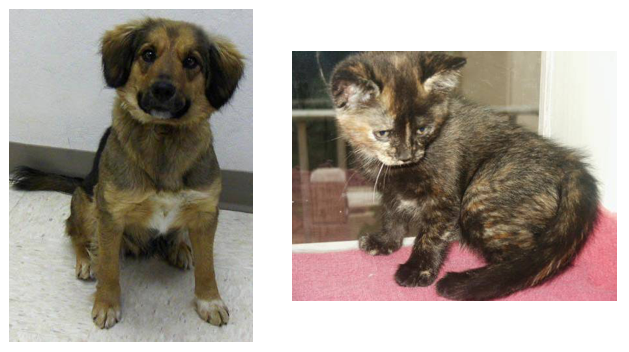

Nous emploierons ce jeu de donn√©es pour entra√Æner un r√©seau de neurones capable de **distinguer les chats des chiens**.  
Aujourd‚Äôhui, cela peut sembler banal, mais il y a encore quelques ann√©es, c‚Äô√©tait un v√©ritable **d√©fi pour les syst√®mes de vision par ordinateur**.

In [6]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms

import helper


La fa√ßon la plus simple de charger des images est d‚Äôutiliser `datasets.ImageFolder` de la biblioth√®que **torchvision** ([documentation](http://pytorch.org/docs/master/torchvision/datasets.html#imagefolder)).  
En g√©n√©ral, vous utiliserez `ImageFolder` comme ceci :

```python
dataset = datasets.ImageFolder('path/to/data', transform=transform)
````

o√π `'path/to/data'` est le chemin d‚Äôacc√®s au r√©pertoire contenant les donn√©es, et `transform` est une **s√©quence d‚Äôop√©rations de pr√©traitement** d√©finies √† l‚Äôaide du module [`transforms`](http://pytorch.org/docs/master/torchvision/transforms.html) de `torchvision`.

`ImageFolder` s‚Äôattend √† une structure de r√©pertoires comme celle-ci :

```
root/dog/xxx.png
root/dog/xxy.png
root/dog/xxz.png

root/cat/123.png
root/cat/nsdf3.png
root/cat/asd932_.png
```

Chaque classe (ici `cat` et `dog`) poss√®de son **propre dossier** contenant les images correspondantes.
Les images sont alors automatiquement **√©tiquet√©es** d‚Äôapr√®s le nom du dossier.
Ainsi, l‚Äôimage `123.png` sera charg√©e avec l‚Äô√©tiquette `cat`.

Vous pouvez t√©l√©charger le jeu de donn√©es d√©j√† structur√© de cette mani√®re [ici](https://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip).
Il est d√©j√† s√©par√© en **jeu d‚Äôentra√Ænement** et **jeu de test**.

---

### üîÑ Transformations

Lors du chargement des donn√©es avec `ImageFolder`, il faut d√©finir des **transformations (transforms)**.
Par exemple, les images ont des tailles diff√©rentes, mais le mod√®le n√©cessite qu‚Äôelles aient toutes la m√™me taille pour l‚Äôentra√Ænement.
On peut donc :

* les **redimensionner** avec `transforms.Resize()`, ou
* les **rogner** avec `transforms.CenterCrop()` ou `transforms.RandomResizedCrop()`.

Il faut √©galement **convertir les images en tenseurs PyTorch** √† l‚Äôaide de `transforms.ToTensor()`.

En g√©n√©ral, ces √©tapes sont combin√©es en un pipeline √† l‚Äôaide de `transforms.Compose()`, qui ex√©cute une liste de transformations dans l‚Äôordre.
Par exemple, pour redimensionner, recadrer, puis convertir en tenseur :

```python
transform = transforms.Compose([
    transforms.Resize(255),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])
```

Il existe de nombreuses autres transformations possibles ‚Äî consultez la [documentation](http://pytorch.org/docs/master/torchvision/transforms.html) pour plus de d√©tails.

---

### üì¶ Data Loaders

Une fois le `ImageFolder` charg√©, il faut le passer √† un [`DataLoader`](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader).
Le **DataLoader** prend un dataset (par exemple celui renvoy√© par `ImageFolder`) et retourne des **lots (batches)** d‚Äôimages et leurs **√©tiquettes** correspondantes.
Vous pouvez r√©gler plusieurs param√®tres, comme :

* la **taille des lots (`batch_size`)**,
* et le **m√©lange des donn√©es (`shuffle`)** √† chaque √©poque.

Exemple :

```python
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)
```

L‚Äôobjet `dataloader` est un **g√©n√©rateur**.
Pour extraire des donn√©es, on peut soit boucler dessus, soit le convertir en it√©rateur et appeler `next()` :

```python
# Boucle pour r√©cup√©rer un batch √† chaque it√©ration
for images, labels in dataloader:
    pass

# Obtenir un seul batch
images, labels = next(iter(dataloader))
```

---

> **Exercice :**
> Chargez les images depuis le dossier `Cat_Dog_data/train`,
> d√©finissez quelques transformations,
> puis construisez le **DataLoader**.



In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# setting working Directory
import os
os.chdir('/content/drive/MyDrive/       Deep Learning/cat_dog_image_classification-20251020T013948Z-1-001/cat_dog_image_classification')

In [9]:
%ls

 Cat_Dog_data/   __MACOSX/
 helper.py      'Part 7 - Loading Image Data (exo)_v2.ipynb'


In [ ]:
# extract Cat_Dog_data.zip
#!unzip Cat_Dog_data.zip

In [10]:
data_dir = 'Cat_Dog_data/train'

transform = transforms.Compose([
    transforms.RandomRotation(30),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])# TODO: compose transforms here
dataset = datasets.ImageFolder(data_dir, transform=transform) # TODO: create the ImageFolder
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True) # TODO: use the ImageFolder dataset to create the DataLoader

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import torch

def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()

    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

<Axes: >

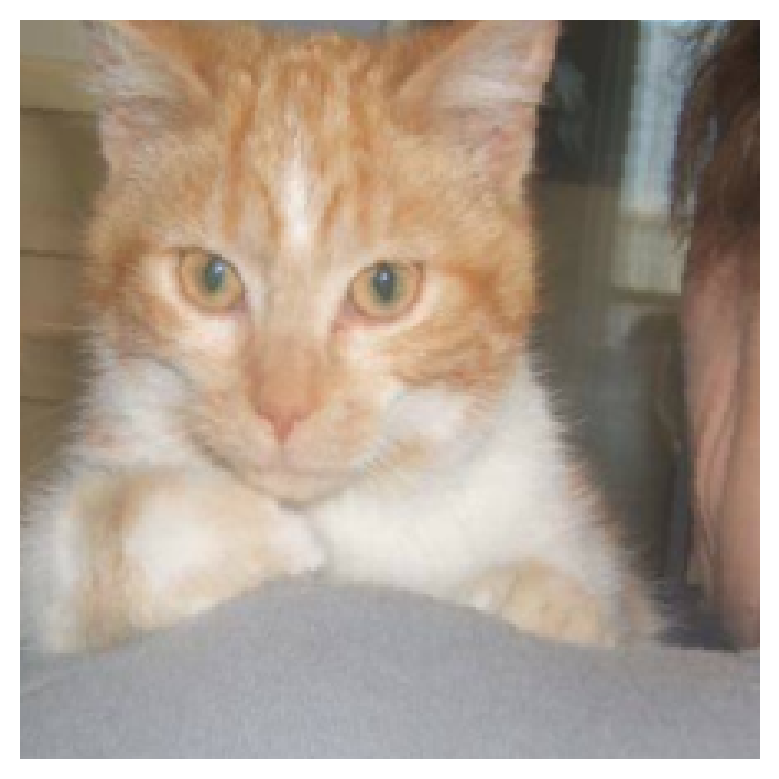

In [7]:
# Run this to test your data loader
images, labels = next(iter(dataloader))
imshow(images[0], normalize=False)

Si vous avez correctement charg√© les donn√©es, vous devriez obtenir un affichage similaire √† celui-ci (votre image sera diff√©rente) :




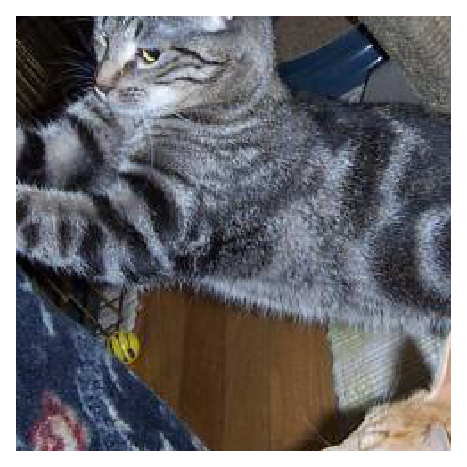


## Augmentation de Donn√©es

Une strat√©gie courante pour entra√Æner des r√©seaux de neurones consiste √† introduire une **certaine forme d‚Äôal√©atoire dans les donn√©es d‚Äôentr√©e**.  
Par exemple, on peut faire tourner, refl√©ter, redimensionner et/ou rogner al√©atoirement les images pendant l‚Äôentra√Ænement.  
Cela aide le r√©seau √† **mieux g√©n√©raliser**, car il voit les m√™mes images sous diff√©rentes formes : positions, tailles, orientations, etc.

Pour appliquer une rotation, un recadrage et un redimensionnement al√©atoires, puis retourner les images horizontalement, on peut d√©finir les transformations ainsi :

```python
train_transforms = transforms.Compose([
    transforms.RandomRotation(30),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5],
                         [0.5, 0.5, 0.5])
])
````

Il est √©galement recommand√© de **normaliser les images** √† l‚Äôaide de `transforms.Normalize`.
Cette transformation prend en entr√©e :

* une liste de **moyennes** (`mean`)
* et une liste d‚Äô**√©carts-types** (`std`)

Chaque canal de couleur est alors normalis√© selon la formule :

```
input[channel] = (input[channel] - mean[channel]) / std[channel]
```

Soustraire la moyenne recentre les donn√©es autour de z√©ro,
et diviser par l‚Äô√©cart-type comprime les valeurs entre **-1 et 1**.
Cette normalisation aide √† maintenir les **poids du r√©seau proches de z√©ro**,
rendant ainsi la **r√©tropropagation plus stable**.
Sans normalisation, le r√©seau risque souvent d‚Äô√©chouer √† apprendre correctement.

Vous pouvez consulter la **liste compl√®te des transformations disponibles** [ici](http://pytorch.org/docs/0.3.0/torchvision/transforms.html).

Lors des phases de **validation** ou de **test**, on utilise g√©n√©ralement des images **non alt√©r√©es** (hormis la normalisation).
Ainsi, pour les donn√©es de validation ou de test, on se contente en g√©n√©ral de **redimensionner** et **recadrer** les images.

---

> **Exercice :**
> D√©finissez ci-dessous les **transformations** pour les donn√©es d‚Äôentra√Ænement et de test.
> Ne mettez pas encore la normalisation.

```



In [8]:
data_dir = 'Cat_Dog_data'

# D√©finition des statistiques de normalisation standard pour ImageNet
norm_mean = [0.485, 0.456, 0.406]
norm_std = [0.229, 0.224, 0.225]

# TODO: Define transforms for the training data and testing data
train_transforms = transforms.Compose([
    transforms.RandomRotation(30),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(norm_mean, norm_std) # Normalisation
])

test_transforms = transforms.Compose([
    transforms.Resize(255),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(norm_mean, norm_std) # Normalisation!
])


# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle = True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle = False)

In [9]:
# change this to the trainloader or testloader
data_iter = iter(trainloader)

In [10]:
images, labels = next(data_iter)
labels

tensor([1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 0, 0])

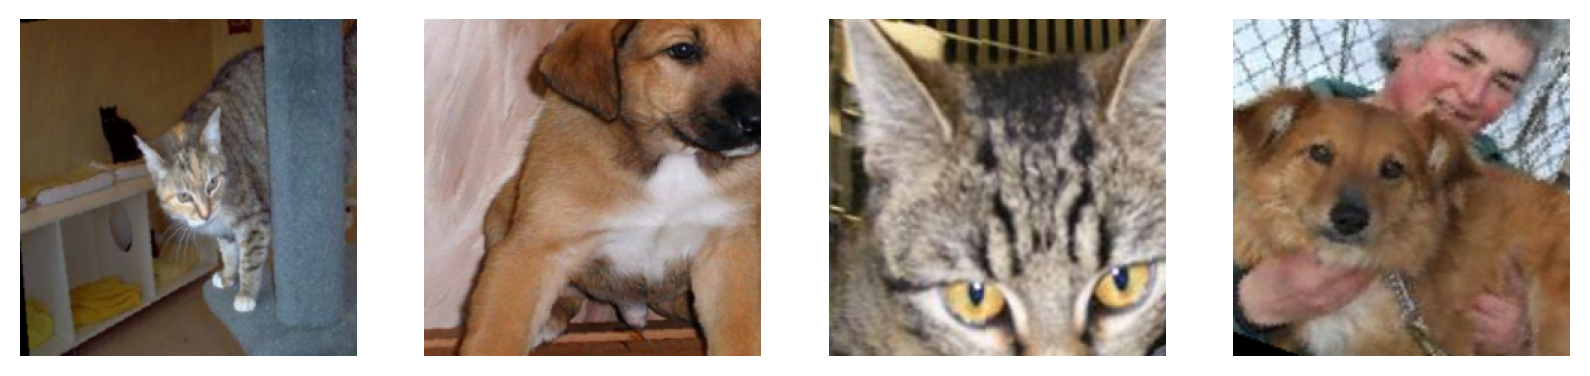

In [11]:


images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for ii in range(4):
    ax = axes[ii]
    imshow(images[ii], ax=ax, normalize= True)

Vos images transform√©es devraient ressembler √† quelque chose comme ceci.




<center>Training examples:</center>


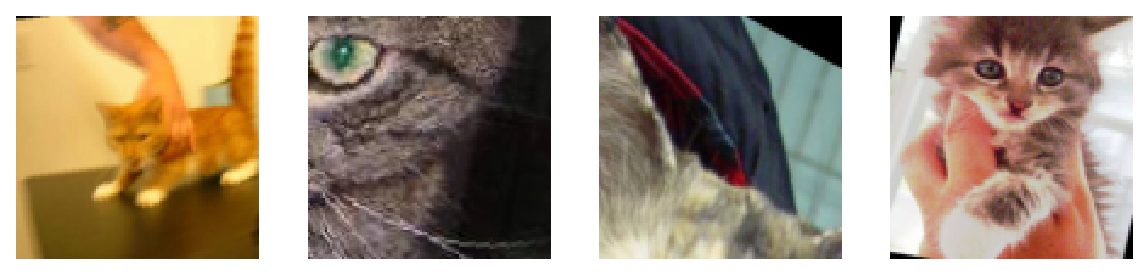

<center>Testing examples:</center>

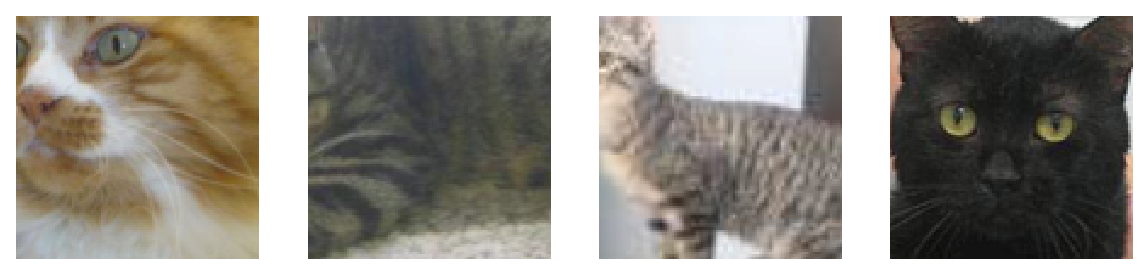


√Ä ce stade, vous devriez √™tre en mesure de charger les donn√©es pour l‚Äôentra√Ænement et le test.  
Vous pouvez maintenant essayer de construire un r√©seau capable de **classer les chats et les chiens**.



In [ ]:
#  TODO: Attempt to build a network with CNN to classify cats vs dogs from this dataset
# --- cr√©er un model from scratc

# TP ‚Äì CNN ‚Äúfrom scratch‚Äù vs Transfert Learning (Cats vs Dogs)

## Objectif

Comparer **un mod√®le CNN entra√Æn√© from scratch** et **un mod√®le en transfert d‚Äôapprentissage** sur le m√™me jeu de donn√©es (cats vs dogs). Montrer l‚Äôimpact du transfert learning sur la convergence, la performance et la robustesse.

## Ce qui est **obligatoire**

1. **Deux exp√©riences distinctes**

   * Exp√©rience A : CNN **from scratch** (architecture simple minimum 3 bloc avec conv).
   * Exp√©rience B : **Transfert learning** (ex. ResNet, MobileNet, EfficientNet‚Ä¶), couches finales adapt√©es.
2. **Bonnes pratiques de r√©gularisation**

   * Utiliser **Dropout** ET **Batch Normalization** (justifier o√π et pourquoi).
3. **Suivi des m√©triques**

   * **Training loss**, **Accuracy**, **Pr√©cision**, **Recall** √† chaque √©poque (et id√©alement sur train/val si vous faites une validation).
   * Tracer des **courbes** et **comparer** les deux approches.
4. **Optimisation**

   * Tester au moins **2 optimiseurs** (ex. SGD et Adam).
   * Chercher un **bon learning rate** (essais ou scheduler).
5. **GPU**

   * Entra√Æner **sur GPU** si disponible (v√©rification et mention dans README).
6. **Persistance du mod√®le**

   * **Sauvegarder** le meilleur mod√®le (.pt/.pth) localement (ne **pas** pousser dans GitHub).
   * **Recharger** le mod√®le pour faire le **test final** et rapporter les m√©triques.
7. **Reproductibilit√©**

   * Fixer un **seed**

## Ce qui est **souhait√© (bonus)**

* **Split train/validation** (clair et justifi√©).
* **Data augmentation** raisonnable.
* **Scheduler** (ex. StepLR, CosineAnnealingLR).
* **Matrice de confusion** et quelques **erreurs typiques** comment√©es.
* Journalisation (TensorBoard/W&B) ‚Äî sans pousser les fichiers lourds.

## Donn√©es

* Utilisez le m√™me corpus **Cats vs Dogs** que vu en cours (ou √©quivalent).
* Ne **poussez pas** les donn√©es sur GitHub. Indiquez seulement **comment** les t√©l√©charger/placer.

## Structure du d√©p√¥t GitHub (exemple)

```
cnn-catsdogs-<NomPrenom>/
‚îú‚îÄ notebook.ipynb
‚îú‚îÄ .gitignore
‚îú‚îÄ requirements.txt (ou environment.yml)
‚îú‚îÄ README.md
‚îî‚îÄ LICENSE (optionnel)
```

### `.gitignore` (minimum)

```
data/
*.pt
*.pth
runs/
checkpoints/
```

## Contenu attendu du **README.md**

* **Titre & objectif** du projet.
* **Environnement** ( `pip install -r requirements.txt` ou `conda env create -f environment.yml`).
* **Organisation des donn√©es** (o√π t√©l√©charger, o√π placer les dossiers).
* **Commandes pour entra√Æner** :

  * From scratch : arguments cl√©s (batch size, lr, epochs, optimiser, dropout, BN, scheduler‚Ä¶).
  * Transfert learning : m√™me chose + quelle base (gel des couches ou fine-tuning).
* **Commandes pour √©valuer / recharger le mod√®le** (chemin du checkpoint local).
* **R√©sultats** : tableaux + courbes (loss/accuracy/pr√©cision/recall) pour les deux exp√©riences, **comparaison et analyse** (2‚Äì3 paragraphes).
* **Limites & pistes d‚Äôam√©lioration** (br√®ves).

## √âvaluation (grille indicative)

* Rigueur exp√©rimentale & m√©triques (30 %)
* Qualit√© des mod√®les & optimisation (25 %)
* Clart√© du code & structure du d√©p√¥t (20 %)
* README (reproductibilit√©, analyse, figures) (20 %)
* Bonus (val split, augmentation, scheduler, confusion matrix) (5 %)

## Remise

* **Poussez votre code sur GitHub** (sans donn√©es ni mod√®les).
* Envoyez **le lien du d√©p√¥t** √† **[diallomous@gmail.com](mailto:diallomous@gmail.com)**
* **Date limite : mercredi  22 octobre 2025 √† 18:00 (Africa/Dakar).**

> Rappel : ne chargez pas les fichiers lourds (datasets, `.pt/.pth`). Assurez-vous que votre d√©p√¥t permet de **reproduire** les exp√©riences via les instructions du README.


## Exp√©rience A : CNN from Scratch

Initialisation du mod√®le et pr√©paration de l'entra√Ænement

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time

# --- D√©finition du Mod√®le (Copie de votre code) ---
class CatDogCNN(nn.Module):
    def __init__(self):
        super(CatDogCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(16)
        self.pool1 = nn.MaxPool2d(2, 2)

        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.pool2 = nn.MaxPool2d(2, 2)

        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(64)
        self.pool3 = nn.MaxPool2d(2, 2)

        # Taille d'entr√©e pour FC: 64 * 28 * 28 = 50176
        self.fc1 = nn.Linear(64 * 28 * 28, 500)
        self.fc2 = nn.Linear(500, 2)
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = self.pool1(F.relu(self.bn1(self.conv1(x))))
        x = self.pool2(F.relu(self.bn2(self.conv2(x))))
        x = self.pool3(F.relu(self.bn3(self.conv3(x))))

        x = x.view(x.size(0), -1)

        x = self.dropout(F.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

# 1. D√©finir le Device (pour Colab, nous activons le GPU si disponible)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Utilisation du device : {device}")

# Instanciation et d√©placement du mod√®le
model_scratch = CatDogCNN().to(device)

# 2. D√©finir la Fonction de Perte
criterion = nn.CrossEntropyLoss()

# 3. D√©finir l'Optimiseur (Adam pour l'Exp√©rience A)
optimizer = optim.Adam(model_scratch.parameters(), lr=0.001)

Utilisation du device : cpu


Boucle d'entra√Ænement et calcul des m√©triques

In [13]:
# --- Fonction de Calcul des M√©triques ---
def calculate_metrics(preds, labels):
    """Calcule l'Accuracy, la Pr√©cision et le Recall (pour la classe 1)."""
    preds_class = torch.argmax(preds, dim=1)

    # Statistiques de base
    corrects = (preds_class == labels).sum().item()

    # Calcul des True Positives (TP), False Positives (FP), False Negatives (FN)
    # Assumons la classe positive (1) est Chien, et la classe n√©gative (0) est Chat.
    TP = ((preds_class == 1) & (labels == 1)).sum().item()
    FP = ((preds_class == 1) & (labels == 0)).sum().item()
    FN = ((preds_class == 0) & (labels == 1)).sum().item()

    # √âvite la division par z√©ro
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0

    accuracy = corrects / labels.size(0)

    return accuracy, precision, recall

# --- Boucle d'Entra√Ænement ---
epochs = 10
train_loss_history = []
test_acc_history = []
test_loss_history = []
# Stockage des autres m√©triques pour les courbes/tableaux demand√©s
test_precision_history = []
test_recall_history = []

print(f"D√©but de l'entra√Ænement de l'Exp√©rience A pour {epochs} √©poques.")
start_time = time.time()

for epoch in range(epochs):
    # Phase d'ENTRA√éNEMENT
    model_scratch.train()
    train_loss = 0.0

    for images, labels in trainloader:
        # **TRANSFERT VERS LE GPU**
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model_scratch(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * images.size(0)

    epoch_train_loss = train_loss / len(trainloader.dataset)

    # Phase de TEST / VALIDATION
    model_scratch.eval()
    test_loss = 0.0
    all_preds, all_labels = [], [] # Pour collecter les r√©sultats

    with torch.no_grad():
        for images, labels in testloader:
            # **TRANSFERT VERS LE GPU**
            images, labels = images.to(device), labels.to(device)

            outputs = model_scratch(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * images.size(0)

            # Stockage des r√©sultats sur CPU pour le calcul des m√©triques
            all_preds.append(outputs.cpu())
            all_labels.append(labels.cpu())

    all_preds = torch.cat(all_preds)
    all_labels = torch.cat(all_labels)

    # Calcul des m√©triques de fin d'√©poque
    test_accuracy, test_precision, test_recall = calculate_metrics(all_preds, all_labels)
    epoch_test_loss = test_loss / len(testloader.dataset)

    # Stockage de l'historique
    train_loss_history.append(epoch_train_loss)
    test_loss_history.append(epoch_test_loss)
    test_acc_history.append(test_accuracy)
    test_precision_history.append(test_precision)
    test_recall_history.append(test_recall)

    # Affichage des r√©sultats
    print(f"Epoch {epoch+1}/{epochs} | Temps total: {time.time() - start_time:.2f}s")
    print(f"  Train Loss: {epoch_train_loss:.4f}")
    print(f"  Test Loss: {epoch_test_loss:.4f} | Acc: {test_accuracy:.4f} | Prec: {test_precision:.4f} | Rec: {test_recall:.4f}")

print("\nEntra√Ænement de l'Exp√©rience A (Adam) termin√©.")

D√©but de l'entra√Ænement de l'Exp√©rience A pour 10 √©poques.
Epoch 1/10 | Temps total: 7088.88s
  Train Loss: 1.0986
  Test Loss: 0.6255 | Acc: 0.6315 | Prec: 0.6472 | Rec: 0.5867
Epoch 2/10 | Temps total: 9451.07s
  Train Loss: 0.6622
  Test Loss: 0.6313 | Acc: 0.6458 | Prec: 0.7334 | Rec: 0.4640
Epoch 3/10 | Temps total: 11800.30s
  Train Loss: 0.6614
  Test Loss: 0.6450 | Acc: 0.6267 | Prec: 0.7768 | Rec: 0.3610
Epoch 4/10 | Temps total: 14108.73s
  Train Loss: 0.6591
  Test Loss: 0.6323 | Acc: 0.6478 | Prec: 0.7603 | Rec: 0.4371
Epoch 5/10 | Temps total: 16417.48s
  Train Loss: 0.6580
  Test Loss: 0.6399 | Acc: 0.6104 | Prec: 0.8880 | Rec: 0.2573
Epoch 6/10 | Temps total: 18450.75s
  Train Loss: 0.6611
  Test Loss: 0.6177 | Acc: 0.6797 | Prec: 0.7500 | Rec: 0.5439
Epoch 7/10 | Temps total: 20762.73s
  Train Loss: 0.6520
  Test Loss: 0.5986 | Acc: 0.7016 | Prec: 0.7161 | Rec: 0.6730
Epoch 8/10 | Temps total: 23062.71s
  Train Loss: 0.6381
  Test Loss: 0.6329 | Acc: 0.6343 | Prec: 

Exp√©rience B : Transfert Learning (VGG-16)

```
L'objectif du Transfert d'Apprentissage est d'utiliser un mod√®le pr√©-entra√Æn√© sur un vaste ensemble de donn√©es (ImageNet) pour gagner en performance et en rapidit√© de convergence.

Nous allons utiliser le mod√®le VGG-16 (un choix courant) :

Charger le mod√®le VGG-16 pr√©-entra√Æn√©.

Geler tous les poids du corps du r√©seau (features).

Remplacer la couche de classification finale (classifier) pour l'adapter √† nos 2 classes (Chat/Chien).

Entra√Æner uniquement la nouvelle couche de classification.
```

In [11]:
import torchvision.models as models
import torch.optim as optim
import torch.nn as nn
import time

# D√©placer le mod√®le sur le GPU si disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --- 1. Charger le Mod√®le VGG-16 Pr√©-entra√Æn√© ---
# Nous chargeons le VGG16 avec les poids pr√©-entra√Æn√©s
model_transfer = models.vgg16(weights='IMAGENET1K_V1')

# --- 2. Geler les Poids du Corps du R√©seau (Feature Extractor) ---
# Cela emp√™che les poids des couches de convolution d'√™tre mis √† jour
for param in model_transfer.parameters():
    param.requires_grad = False

# --- 3. Remplacer la Couche de Classification Finale ---
# La classification d'origine du VGG est pour 1000 classes.
# La derni√®re couche est model_transfer.classifier[6]
# VGG16 a une taille d'entr√©e fixe de 25088 pour la classification
num_ftrs = model_transfer.classifier[0].in_features

# Nouvelle s√©quence de couches de classification (avec Dropout pour la r√©gularisation)
model_transfer.classifier = nn.Sequential(
    nn.Linear(num_ftrs, 500),  # Premi√®re couche FC
    nn.ReLU(),
    nn.Dropout(0.5),           # Dropout (r√©gularisation obligatoire)
    nn.Linear(500, 2)          # Couche de sortie pour 2 classes
)

# 4. D√©placer le mod√®le et d√©finir l'Optimiseur
model_transfer.to(device)

# Nous n'optimisons QUE les param√®tres de la nouvelle classification
optimizer_transfer = optim.Adam(model_transfer.classifier.parameters(), lr=0.001)

# Fonction de perte (identique √† l'Exp√©rience A)
criterion_transfer = nn.CrossEntropyLoss()

# --- Entra√Ænement de l'Exp√©rience B ---

# R√©utiliser la fonction calculate_metrics d√©finie pr√©c√©demment
# ... (Ins√©rez la d√©finition de calculate_metrics ici si vous ex√©cutez cette cellule seule) ...

epochs_transfer = 10
# Historiques pour le Transfer Learning
tl_train_loss_history = []
tl_test_acc_history = []
# ... (autres listes d'historique pour precision, recall, loss) ...

print(f"D√©but de l'entra√Ænement de l'Exp√©rience B (Transfer Learning) sur {device}")
start_time_tl = time.time()

for epoch in range(epochs_transfer):
    # Boucle d'entra√Ænement (similaire √† Exp√©rience A, mais utilise model_transfer et optimizer_transfer)
    model_transfer.train()
    # ... (code de la boucle d'entra√Ænement) ...

    # Boucle de test/validation (similaire √† Exp√©rience A, utilise model_transfer)
    model_transfer.eval()
    # ... (code de la boucle de validation) ...

    # Calcul et stockage des m√©triques (tl_train_loss_history, tl_test_acc_history, etc.)
    # ...

    # Affichage
    # print(f"Epoch {epoch+1}... | Test Acc: {test_accuracy:.4f}")

D√©but de l'entra√Ænement de l'Exp√©rience B (Transfer Learning) sur cpu


Fonction de calcul des m√©triques

In [12]:
# --- Fonction de Calcul des M√©triques (√Ä ex√©cuter avant les deux boucles) ---
def calculate_metrics(preds, labels):
    """Calcule l'Accuracy, la Pr√©cision et le Recall (pour la classe 1)."""
    preds_class = torch.argmax(preds, dim=1)

    # Statistiques de base
    corrects = (preds_class == labels).sum().item()

    # Calcul des True Positives (TP), False Positives (FP), False Negatives (FN)
    # Assumons la classe positive (1) est Chien, et la classe n√©gative (0) est Chat.
    TP = ((preds_class == 1) & (labels == 1)).sum().item()
    FP = ((preds_class == 1) & (labels == 0)).sum().item()
    FN = ((preds_class == 0) & (labels == 1)).sum().item()

    # √âvite la division par z√©ro
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0

    accuracy = corrects / labels.size(0)

    return accuracy, precision, recall

In [13]:
import torch
from torchvision import datasets, transforms

# 1. D√©finition des chemins et des transformations
# Assurez-vous que le chemin 'Cat_Dog_data' est correct.
data_dir = 'Cat_Dog_data'

# Transformations pour l'entra√Ænement (avec augmentation et Normalization pour VGG)
train_transforms = transforms.Compose([
    transforms.RandomRotation(30),
    transforms.RandomResizedCrop(224), # 224x224 est la taille attendue par VGG-16
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], # Moyennes ImageNet
                         [0.229, 0.224, 0.225]) # √âcarts-types ImageNet
])

# Transformations pour le test (uniquement redimensionnement, recadrage et Normalization)
test_transforms = transforms.Compose([
    transforms.Resize(255),
    transforms.CenterCrop(224), # 224x224 est la taille attendue par VGG-16
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])


# 2. Cr√©ation des datasets et dataloaders
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

# Assurez-vous d'avoir une taille de lot (batch_size) g√©rable sur CPU
batch_size = 32 # ou 16 si la m√©moire CPU est insuffisante
trainloader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

print("Dataloaders d√©finis et pr√™ts.")

Dataloaders d√©finis et pr√™ts.


In [ ]:
import torchvision.models as models
import torch.optim as optim
import torch.nn as nn
import time
import torch # Pour torch.cat, torch.argmax, etc.
# Assurez-vous d'importer la fonction calculate_metrics depuis une cellule pr√©c√©dente

# D√©placer le mod√®le sur le GPU si disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --- 1. Charger le Mod√®le VGG-16 Pr√©-entra√Æn√© ---
model_transfer = models.vgg16(weights='IMAGENET1K_V1')

# --- 2. Geler les Poids du Corps du R√©seau (Feature Extractor) ---
for param in model_transfer.parameters():
    param.requires_grad = False

# --- 3. Remplacer la Couche de Classification Finale (CORRECTION DU BUG DE SHAPE) ---
# La taille d'entr√©e est celle de la PREMI√àRE couche du classifieur original (25088 pour VGG-16)
num_ftrs = model_transfer.classifier[0].in_features

# Nouvelle s√©quence de couches de classification
model_transfer.classifier = nn.Sequential(
    # Le premier Linear utilise le num_ftrs corrig√© (25088)
    nn.Linear(num_ftrs, 500),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(500, 2)
)

# 4. D√©placer le mod√®le et d√©finir l'Optimiseur
model_transfer.to(device)

optimizer_transfer = optim.Adam(model_transfer.classifier.parameters(), lr=0.001)
criterion_transfer = nn.CrossEntropyLoss()

# --- Entra√Ænement de l'Exp√©rience B ---
epochs_transfer = 10
tl_train_loss_history = []
tl_test_acc_history = []
tl_test_loss_history = []
tl_test_precision_history = []
tl_test_recall_history = []

print(f"D√©but de l'entra√Ænement de l'Exp√©rience B (Transfer Learning) sur {device}")
start_time_tl = time.time()

for epoch in range(epochs_transfer):
    # Phase d'ENTRA√éNEMENT
    model_transfer.train()
    train_loss = 0.0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)
        optimizer_transfer.zero_grad()
        outputs = model_transfer(images) # Correction effectu√©e par le changement de num_ftrs
        loss = criterion_transfer(outputs, labels)
        loss.backward()
        optimizer_transfer.step()
        train_loss += loss.item() * images.size(0)

    epoch_train_loss_tl = train_loss / len(trainloader.dataset)

    # Phase de TEST / VALIDATION
    model_transfer.eval()
    test_loss = 0.0
    all_preds, all_labels = [], []

    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model_transfer(images)
            loss = criterion_transfer(outputs, labels)
            test_loss += loss.item() * images.size(0)

            all_preds.append(outputs.cpu())
            all_labels.append(labels.cpu())

    all_preds = torch.cat(all_preds)
    all_labels = torch.cat(all_labels)

    test_accuracy, test_precision, test_recall = calculate_metrics(all_preds, all_labels)
    epoch_test_loss_tl = test_loss / len(testloader.dataset)

    # Stockage de l'historique
    tl_train_loss_history.append(epoch_train_loss_tl)
    tl_test_loss_history.append(epoch_test_loss_tl)
    tl_test_acc_history.append(test_accuracy)
    tl_test_precision_history.append(test_precision)
    tl_test_recall_history.append(test_recall)

    # Affichage des r√©sultats
    print(f"Epoch {epoch+1}/{epochs_transfer} | Temps total: {time.time() - start_time_tl:.2f}s")
    print(f"  Train Loss: {epoch_train_loss_tl:.4f}")
    print(f"  Test Loss: {epoch_test_loss_tl:.4f} | Acc: {test_accuracy:.4f} | Prec: {test_precision:.4f} | Rec: {test_recall:.4f}")

print("\nEntra√Ænement de l'Exp√©rience B (Transfer Learning) termin√©.")

D√©but de l'entra√Ænement de l'Exp√©rience B (Transfer Learning) sur cpu


Trac√© des r√©sultats de comparaison

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
epochs_a = range(1, len(train_loss_history) + 1)
epochs_b = range(1, len(tl_train_loss_history) + 1)

# Courbe de Loss de Test
axes[0].plot(epochs_a, test_loss_history, label='Exp. A (Scratch) Test Loss', marker='o')
axes[0].plot(epochs_b, tl_test_loss_history, label='Exp. B (Transfer) Test Loss', marker='x')
axes[0].set_title('Comparaison de la Loss de Test')
axes[0].set_xlabel('√âpoques')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True)

# Courbe d'Accuracy de Test
axes[1].plot(epochs_a, test_acc_history, label='Exp. A (Scratch) Test Acc', marker='o')
axes[1].plot(epochs_b, tl_test_acc_history, label='Exp. B (Transfer) Test Acc', marker='x')
axes[1].set_title('Comparaison de l\'Accuracy de Test')
axes[1].set_xlabel('√âpoques')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid(True)

plt.show()